### **LIBRARY**

In [95]:
from keras.callbacks import ModelCheckpoint
from keras.layers import Dense, Dropout, Reshape, Flatten, concatenate, Input, Conv1D, GlobalMaxPooling1D, Embedding
from keras.layers.recurrent import LSTM
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Model
from sklearn.model_selection import train_test_split
from tensorflow.python import tf2
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras
import numpy as np
import tensorflow
import pandas as pd
import os
import collections
import re
import string
import keras
import nltk
import nltk
nltk.download('punkt')
from gensim import models

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### **READING DATA SET FROM INTERNAL DIRECTORY**

In [96]:
data = pd.read_csv('finaldatasettt.TSV', error_bad_lines=False, header = None, delimiter='\t')

In [97]:
data.columns = ['Text', 'Label']

In [98]:
data.dropna()


,Text,Label
0,BARREEFFAMA KAMUU DUBISTEE BIRA KUTUUN GAARIIDHA.,2.0
1,Jabaadha ummata kenya gootota kenyaa.,1.0
2,Barrefama adda adda maalif hin garsiftan.,2.0
3,Sagaleen sirrii hin jiruu.,2.0
4,WBO waliin dhaabanne Mootummaa kana Ofirraa ka...,0.0
...,...,...
2094,Oromoo bilxgiinaan badu qabdii.,0.0
2095,Ayyolee hin marate namichaa marata ayyole mara...,0.0
2096,Jarattii burjaajofttuu kana ilaalaa me haceen ...,0.0
2098,umani oromoo kun malumaf gowoma kanna mara iss...,2.0


In [99]:
data.Label.unique()
data=data.dropna()
data.Label.unique()

array([2., 1., 0.])

In [100]:
data.shape

(2072, 2)

In [101]:
#data.Label.value_counts()

## **Panctuation mark removal**

In [102]:
def remove_punct(text):
    text_nopunct = ''
    text_nopunct = re.sub('['+string.punctuation+']', '', text)
    return text_nopunct

data['Text_Clean'] = data['Text'].apply(lambda x: remove_punct(x))

## **Tokenization**

In [103]:
from nltk import word_tokenize, WordNetLemmatizer
tokens = [word_tokenize(sen) for sen in data.Text_Clean] 

# **Lower case Conversion**

In [104]:
def lower_token(tokens): 
    return [w.lower() for w in tokens]    
    
lower_tokens = [lower_token(token) for token in tokens] 
data['tokens']=lower_tokens

## **Stop word Removal**

In [105]:
with open("AfaanOromoStopwords.csv",encoding ='unicode_escape') as f:
   stoplist=f.read().strip().split(',')

In [106]:
variable=data['tokens'].tolist()

In [107]:
def remove_stop_words(tokens): 
    return [word for word in tokens if word not in stoplist]

In [108]:
f=[remove_stop_words(sen) for sen in variable]
result=[' '.join(sen) for sen in f]
data['Text_Final']=result

In [109]:
filtered_words = [remove_stop_words(sen) for sen in lower_tokens]
result = [' '.join(sen) for sen in filtered_words] 
data['Text_Final'] = result

In [110]:
data

,Text,Label,Text_Clean,tokens,Text_Final
0,BARREEFFAMA KAMUU DUBISTEE BIRA KUTUUN GAARIIDHA.,2.0,BARREEFFAMA KAMUU DUBISTEE BIRA KUTUUN GAARIIDHA,"[barreeffama, kamuu, dubistee, bira, kutuun, g...",barreeffama kamuu dubistee kutuun gaariidha
1,Jabaadha ummata kenya gootota kenyaa.,1.0,Jabaadha ummata kenya gootota kenyaa,"[jabaadha, ummata, kenya, gootota, kenyaa]",jabaadha ummata kenya gootota kenyaa
2,Barrefama adda adda maalif hin garsiftan.,2.0,Barrefama adda adda maalif hin garsiftan,"[barrefama, adda, adda, maalif, hin, garsiftan]",barrefama adda adda maalif hin garsiftan
3,Sagaleen sirrii hin jiruu.,2.0,Sagaleen sirrii hin jiruu,"[sagaleen, sirrii, hin, jiruu]",sagaleen sirrii hin jiruu
4,WBO waliin dhaabanne Mootummaa kana Ofirraa ka...,0.0,WBO waliin dhaabanne Mootummaa kana Ofirraa ka...,"[wbo, waliin, dhaabanne, mootummaa, kana, ofir...",wbo waliin dhaabanne mootummaa ofirraa kaasu q...
...,...,...,...,...,...
2094,Oromoo bilxgiinaan badu qabdii.,0.0,Oromoo bilxgiinaan badu qabdii,"[oromoo, bilxgiinaan, badu, qabdii]",oromoo bilxgiinaan badu qabdii
2095,Ayyolee hin marate namichaa marata ayyole mara...,0.0,Ayyolee hin marate namichaa marata ayyole mara...,"[ayyolee, hin, marate, namichaa, marata, ayyol...",ayyolee hin marate namichaa marata ayyole mara...
2096,Jarattii burjaajofttuu kana ilaalaa me haceen ...,0.0,Jarattii burjaajofttuu kana ilaalaa me haceen ...,"[jarattii, burjaajofttuu, kana, ilaalaa, me, h...",jarattii burjaajofttuu ilaalaa me haceen enyuu...
2098,umani oromoo kun malumaf gowoma kanna mara iss...,2.0,umani oromoo kun malumaf gowoma kanna mara iss...,"[umani, oromoo, kun, malumaf, gowoma, kanna, m...",umani oromoo malumaf gowoma kanna mara issa go...


# **Assign Dataset to the class**

In [111]:
anti = []
ext = []
neu = []
for l in data.Label:
    if l == 0:
        anti.append(0)
        ext.append(1)
        neu.append(0)
    elif l == 1:
        anti.append(1)
        ext.append(0)
        neu.append(0)
    elif l == 2:
        neu.append(1)
        anti.append(0)
        ext.append(0)

In [112]:
data['Anti_Extreme']= anti
data['Extreme']= ext
data['Neutral']= neu

In [113]:
data.head()

,Text,Label,Text_Clean,tokens,Text_Final,Anti_Extreme,Extreme,Neutral
0,BARREEFFAMA KAMUU DUBISTEE BIRA KUTUUN GAARIIDHA.,2.0,BARREEFFAMA KAMUU DUBISTEE BIRA KUTUUN GAARIIDHA,"[barreeffama, kamuu, dubistee, bira, kutuun, g...",barreeffama kamuu dubistee kutuun gaariidha,0,0,1
1,Jabaadha ummata kenya gootota kenyaa.,1.0,Jabaadha ummata kenya gootota kenyaa,"[jabaadha, ummata, kenya, gootota, kenyaa]",jabaadha ummata kenya gootota kenyaa,1,0,0
2,Barrefama adda adda maalif hin garsiftan.,2.0,Barrefama adda adda maalif hin garsiftan,"[barrefama, adda, adda, maalif, hin, garsiftan]",barrefama adda adda maalif hin garsiftan,0,0,1
3,Sagaleen sirrii hin jiruu.,2.0,Sagaleen sirrii hin jiruu,"[sagaleen, sirrii, hin, jiruu]",sagaleen sirrii hin jiruu,0,0,1
4,WBO waliin dhaabanne Mootummaa kana Ofirraa ka...,0.0,WBO waliin dhaabanne Mootummaa kana Ofirraa ka...,"[wbo, waliin, dhaabanne, mootummaa, kana, ofir...",wbo waliin dhaabanne mootummaa ofirraa kaasu q...,0,1,0


In [114]:
data['tokens'] = filtered_words
data = data[['Text_Final', 'tokens', 'Label', 'Anti_Extreme', 'Extreme', 'Neutral']]
data[:4]

,Text_Final,tokens,Label,Anti_Extreme,Extreme,Neutral
0,barreeffama kamuu dubistee kutuun gaariidha,"[barreeffama, kamuu, dubistee, kutuun, gaariidha]",2.0,0,0,1
1,jabaadha ummata kenya gootota kenyaa,"[jabaadha, ummata, kenya, gootota, kenyaa]",1.0,1,0,0
2,barrefama adda adda maalif hin garsiftan,"[barrefama, adda, adda, maalif, hin, garsiftan]",2.0,0,0,1
3,sagaleen sirrii hin jiruu,"[sagaleen, sirrii, hin, jiruu]",2.0,0,0,1


# **Word Embeding #Word2Vec**

In [115]:
X=list(data['tokens'])

In [116]:
from gensim.models import Word2Vec
emb=Word2Vec(X,size=100,min_count=1)

In [117]:
len(emb.wv.vocab)

6338

In [118]:
emb.wv.most_similar('mottuma')

[('hin', 0.6740466952323914),
 ('oromoo', 0.655398428440094),
 ('biyyaa', 0.6493326425552368),
 ('afaan', 0.6121487617492676),
 ('bakka', 0.6114537119865417),
 ('jira', 0.5997276306152344),
 ('yaa', 0.5943645238876343),
 ('walloo', 0.5894581079483032),
 ('abiyi', 0.5781440734863281),
 ('tokko', 0.576689600944519)]

# **Dataset Spliting for Training and testing**

In [119]:
data_train, data_test = train_test_split(data, test_size=0.2, random_state=42)

In [120]:
all_training_words = [word for tokens in data_train["tokens"] for word in tokens]
training_sentence_lengths = [len(tokens) for tokens in data_train["tokens"]]
TRAINING_VOCAB = sorted(list(set(all_training_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_training_words), len(TRAINING_VOCAB)))
print("Max sentence length is %s" % max(training_sentence_lengths))

15155 words total, with a vocabulary size of 5607
Max sentence length is 42


In [121]:
all_test_words = [word for tokens in data_test["tokens"] for word in tokens]
test_sentence_lengths = [len(tokens) for tokens in data_test["tokens"]]
TEST_VOCAB = sorted(list(set(all_test_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_test_words), len(TEST_VOCAB)))
print("Max sentence length is %s" % max(test_sentence_lengths))

3767 words total, with a vocabulary size of 2118
Max sentence length is 28


In [122]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged

def get_word2vec_embeddings(vectors, clean_comments, generate_missing=False):
    embeddings = clean_comments['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings)

In [123]:
emb.wv.most_similar('oromoo')

[('hin', 0.915169894695282),
 ('jira', 0.8148970603942871),
 ('ummata', 0.7991864681243896),
 ('jiru', 0.7985255718231201),
 ('bakka', 0.79607093334198),
 ('tokko', 0.7924201488494873),
 ('oromo', 0.7868816256523132),
 ('nama', 0.7799258232116699),
 ('qaba', 0.7779949903488159),
 ('oromoon', 0.767450749874115)]

In [124]:
training_embeddings = get_word2vec_embeddings(emb, data_train, generate_missing=True)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """


In [125]:
MAX_SEQUENCE_LENGTH = 40
EMBEDDING_DIM = 100

In [126]:
tokenizer = Tokenizer(num_words=len(TRAINING_VOCAB), lower=True, char_level=False)
tokenizer.fit_on_texts(data_train["Text_Final"].tolist())
training_sequences = tokenizer.texts_to_sequences(data_train["Text_Final"].tolist())

train_word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(train_word_index))

Found 5607 unique tokens.


In [127]:
train_cnn_data = pad_sequences(training_sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [128]:
train_embedding_weights = np.zeros((len(train_word_index)+1, EMBEDDING_DIM))
for word,index in train_word_index.items():
    train_embedding_weights[index,:] = emb[word] if word in emb else np.random.rand(EMBEDDING_DIM)
print(train_embedding_weights.shape)

(5608, 100)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__contains__` (Method will be removed in 4.0.0, use self.wv.__contains__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  This is separate from the ipykernel package so we can avoid doing imports until


In [129]:
test_sequences = tokenizer.texts_to_sequences(data_test["Text_Final"].tolist())
test_cnn_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)

# **Long Short-Term Memory model**

In [130]:
def rnn(embeddings, 
        max_sequence_length, 
        num_words, 
        embedding_dim, 
        labels_index):
    
    embedding_layer = Embedding(num_words,
                                embedding_dim,
                                weights=[embeddings],
                                input_length=max_sequence_length,
                                trainable=True)
    
    sequence_input = Input(shape=(max_sequence_length,),
                                  dtype='int32')
    embedded_sequences = embedding_layer(sequence_input) 
    lstm = LSTM(128)(embedded_sequences)
    
    x = Dense(128, activation='relu')(lstm)
    x = Dropout(0.2)(x)
    preds = Dense(labels_index, activation='softmax')(x)    
    model = Model(sequence_input, preds)
    model.compile(loss='binary_crossentropy',
                  optimizer='adam',
                  metrics=['acc'])
    model.summary()
    return model

In [131]:
label_names = ['Anti_Extreme', 'Extreme', 'Neutral']
labels = [1, 0,2]
y_train = data_train[label_names].values
x_train = train_cnn_data
y_tr = y_train
y_test = data_test[label_names].values

In [132]:
model = rnn(train_embedding_weights, 
            MAX_SEQUENCE_LENGTH, 
            len(train_word_index)+1, 
            EMBEDDING_DIM, 
            len(list(label_names)))

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 40)]              0         
                                                                 
 embedding_2 (Embedding)     (None, 40, 100)           560800    
                                                                 
 lstm_2 (LSTM)               (None, 128)               117248    
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dropout_2 (Dropout)         (None, 128)               0         
                                                                 
 dense_5 (Dense)             (None, 3)                 387       
                                                                 
Total params: 694,947
Trainable params: 694,947
Non-trainab

# **Testing Accuracy of The model**

In [133]:
num_epochs = 10
batch_size = 34
hist = model.fit(x_train, 
                 y_tr, 
                 epochs=num_epochs, 
                 validation_split=0.2, 
                 shuffle=True, 
                 batch_size=batch_size)

Epoch 1/10
39/39 [==============================] - 8s 132ms/step - loss: 0.6114 - acc: 0.5215 - val_loss: 0.5595 - val_acc: 0.5301
Epoch 2/10
39/39 [==============================] - 5s 122ms/step - loss: 0.4514 - acc: 0.6438 - val_loss: 0.4175 - val_acc: 0.6898
Epoch 3/10
39/39 [==============================] - 5s 121ms/step - loss: 0.2584 - acc: 0.7842 - val_loss: 0.4313 - val_acc: 0.6988
Epoch 4/10
39/39 [==============================] - 5s 119ms/step - loss: 0.1413 - acc: 0.9132 - val_loss: 0.4888 - val_acc: 0.7289
Epoch 5/10
39/39 [==============================] - 5s 119ms/step - loss: 0.0562 - acc: 0.9789 - val_loss: 0.5401 - val_acc: 0.6807
Epoch 6/10
39/39 [==============================] - 5s 119ms/step - loss: 0.0176 - acc: 0.9955 - val_loss: 0.8424 - val_acc: 0.7319
Epoch 7/10
39/39 [==============================] - 5s 118ms/step - loss: 0.0086 - acc: 0.9985 - val_loss: 0.7731 - val_acc: 0.7440
Epoch 8/10
39/39 [==============================] - 5s 119ms/step - loss: 0.

In [134]:
predictions = model.predict(test_cnn_data, batch_size=1024, verbose=1)

1/1 [==============================] - 0s 437ms/step


In [135]:
prediction_labels=[]
for p in predictions:
    prediction_labels.append(labels[np.argmax(p)])

In [136]:
#data

# **Accuracy Of the LSTM model**

In [137]:
sum(data_test.Label==prediction_labels)/len(prediction_labels)

0.7060240963855422

In [138]:
from sklearn.metrics import classification_report
y_pred = model.predict(test_cnn_data)
y_pred = np.argmax(y_pred, axis=1)
print(classification_report(np.argmax(y_test,axis=1), y_pred))

              precision    recall  f1-score   support

           0       0.78      0.59      0.67       115
           1       0.88      0.76      0.82       219
           2       0.42      0.72      0.53        81

    accuracy                           0.71       415
   macro avg       0.69      0.69      0.67       415
weighted avg       0.76      0.71      0.72       415



In [139]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(test_cnn_data)
y_pred = np.argmax(y_pred, axis=1)

conf_mat = confusion_matrix(np.argmax(y_test,axis=1),y_pred)
conf_mat

array([[ 68,  11,  36],
       [  7, 167,  45],
       [ 12,  11,  58]])

# **Training And Validation Accuracy**

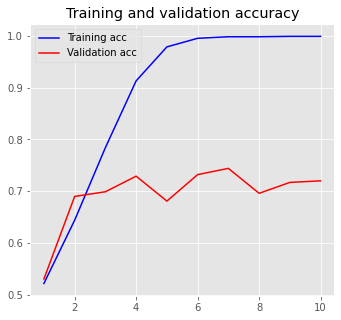

In [140]:
import matplotlib.pyplot as plt 
 
plt.style.use('ggplot') 
 
def plot_history(history): 
    acc = history.history['acc'] 
    val_acc = history.history['val_acc'] 
    x = range(1, len(acc) + 1) 
 
    plt.figure(figsize=(12, 5)) 
    plt.subplot(1, 2, 1) 
    plt.plot(x, acc, 'b', label='Training acc') 
    plt.plot(x, val_acc, 'r', label='Validation acc') 
    plt.title('Training and validation accuracy') 
    plt.legend() 
    plt.legend() 
 
%matplotlib inline 
plot_history(hist)

# **Architecture of LSTM model**

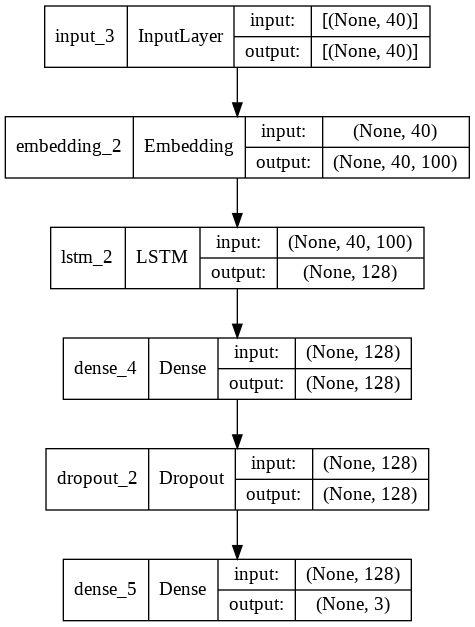

In [141]:
#pip install -q pydot
from keras .utils.vis_utils import plot_model
plot_model(model, to_file='model_plot3.png', show_shapes=True, show_layer_names=True)